<a href="https://colab.research.google.com/github/irinap9270/hg_ml/blob/main/Ch7-3.%20ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss Function

In [3]:
# 데이터셋 적재, 나눔
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [5]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
# 케라스 층을 추가하면, 은닉층 뒤에 또 하나의 층을 추가
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model = model_fn()
# 모델 구조 확인
model.summary()

# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# fit()의 결과를 history에 저장
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

print(history.history.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
dict_keys(['loss', 'accuracy'])


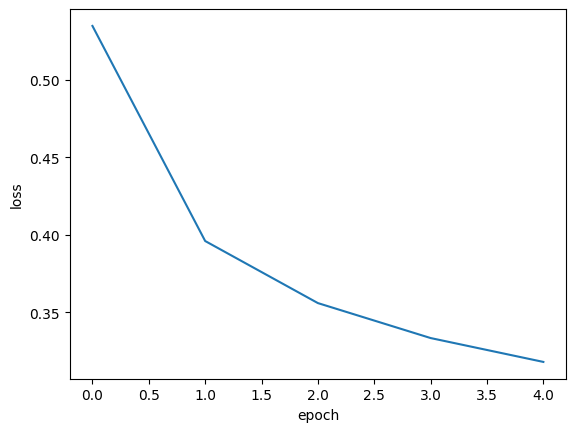

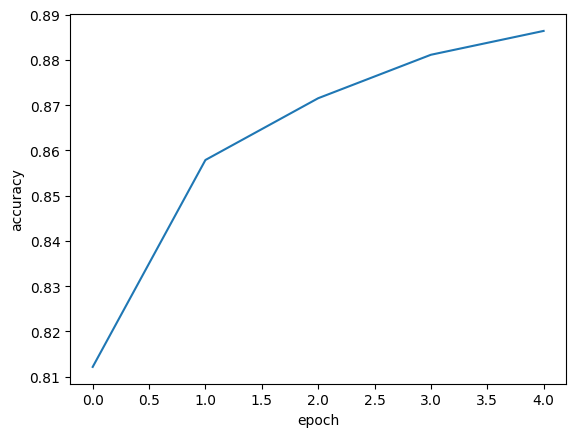

In [6]:
import matplotlib.pyplot as plt
# epoch에 대한 손실 변화 그래프 출력
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# epoch에 대한 정확도 변화 그래프 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

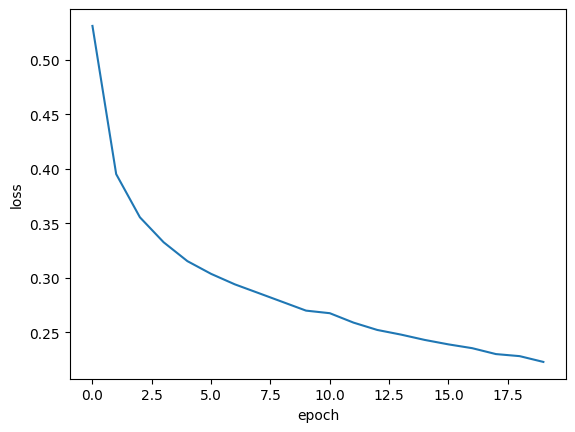

In [8]:
# epoch=20으로 설정 후 모델 훈련
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
# epoch에 대한 손실 변화 그래프 출력
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증 손실

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


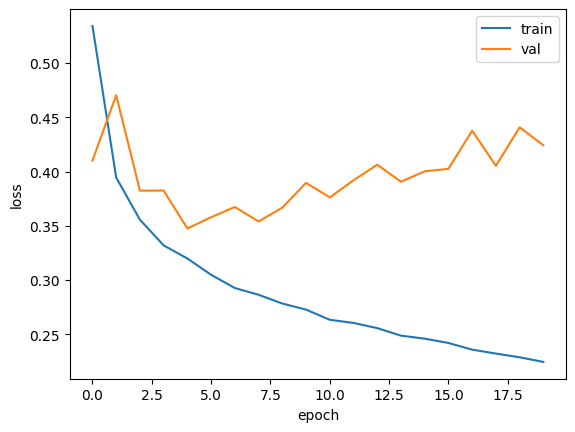

In [10]:
# fit()에 검증 데이터 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# fit() 반환값 확인
print(history.history.keys())

# 훈련 손실과 검증 손실에 대한 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> 검증 손실이 감소하다 증가한다 : 과대적합

> 옵티마이저를 사용해보면 어떨까?

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


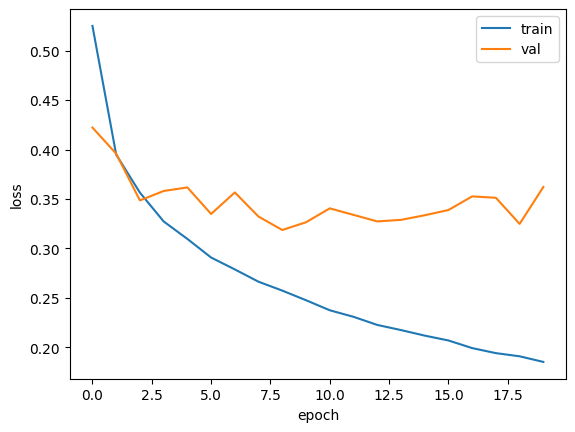

In [11]:
# Adam을 사용한 모델 생성
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# fit() 반환값 확인
print(history.history.keys())

# 훈련 손실과 검증 손실에 대한 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# DropOut

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


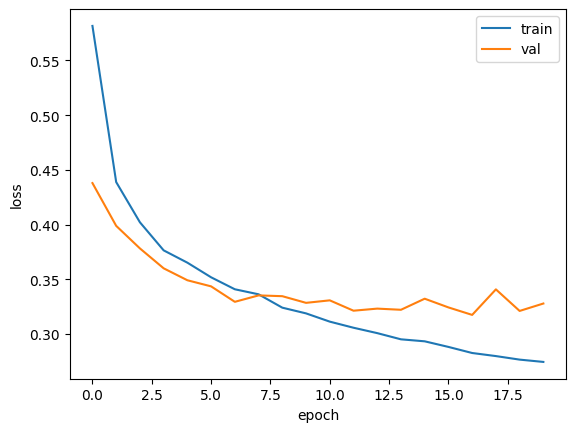

In [12]:
# Dropuout 클래스 추가
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# fit() 반환값 확인
print(history.history.keys())

# 훈련 손실과 검증 손실에 대한 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 저장, 복원

In [13]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

# 훈련된 파라미터 저장
model.save_weights('model-weights.h5')
# 훈련된 모델 구조, 파라미터 저장
model.save('model-whole.h5')

# 저장 확인
!ls -al *.h5

# 저장해놓은 파라미터 불러오기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# 10개의 확률 중 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교 (정확도 확인)
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

# 모델 전체를 불러왔을 때 정확도 확인
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

-rw-r--r-- 1 root root 333320 Jun  2 06:56 model-weights.h5
-rw-r--r-- 1 root root 981176 Jun  2 06:56 model-whole.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 1s 2ms/step
0.8805833333333334
375/375 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.8806


[0.32488730549812317, 0.8805833458900452]

# Callback(콜백)

In [17]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 가장 갖은 검증 손실을 갖는 모델을 epoch 단위 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
# 검증 점수에 따라 종료할 epoch 수 지정
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

print(early_stopping_cb.stopped_epoch)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8778
7


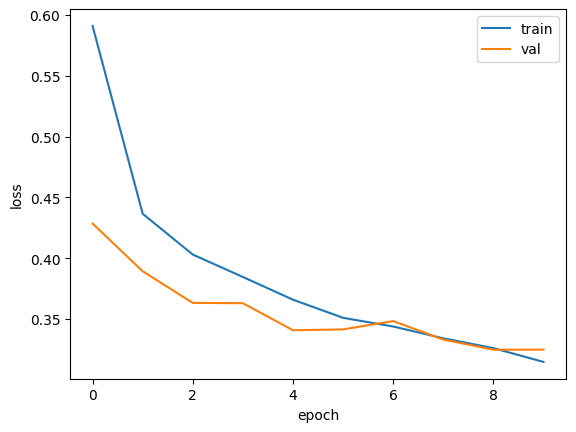

375/375 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8778


[0.33741655945777893, 0.8778333067893982]

In [18]:
# 훈련 손실과 검증 손실에 대한 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 정확도 출력
model.evaluate(val_scaled, val_target)